In [6]:
import pandas as pd
import math
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
class VtuneCSV():
    """
        Pass a list of strings containing paths to CSV files. 
        Each file name should only contain integers
            - These files will be plotted in ascending order based on filename
    """
    data = None
    names = None
    
    def __init__ (self, csv_list):
        self.data = []
        self.names = [os.path.basename(a).strip(".csv") for a in csv_list]
        if isinstance(csv_list, list) == False:
            csv_list = [csv_list]

        for csv_file in csv_list: 
            raw_data = pd.read_csv(csv_file)
            raw_data = self.remove_empty_cols(raw_data)
            raw_data = raw_data.dropna(axis=1, how="all") 
            function_col = raw_data.columns[0]
            raw_data = raw_data.set_index(function_col)
            raw_data = raw_data.drop(' [Unknown stack frame(s)]')
            raw_data = raw_data.rename(lambda x: x.strip(" []").replace("Loop at line ", ""))
            raw_data = raw_data.groupby(raw_data.index, sort=False).first()
            self.data.append(raw_data)
            
    def remove_empty_cols(self, raw_data):
        empties = (raw_data.iloc[:,:].sum() != 0)
        raw_data = raw_data.iloc[:,list(empties)]
        return raw_data
    
    def get_frame(self, function, metric):
        a= pd.DataFrame()
        for td in self.data:
            a = pd.concat([a, td[metric]])
        a.columns = [metric]
        a = a.loc[function]
        a.index = self.names
        a.index = [int(idx) for idx in list(a.index)]
        a = a.sort_index(ascending=True)
        a.index = [str(idx) for idx in list(a.index)]
        a.index.name = function
        return a
    

        



In [34]:
topdown_files = os.listdir("./data/scaling/topdown")
topdown_files = ["./data/scaling/topdown/%s" % a for a in topdown_files]

In [44]:
topdown = VtuneCSV(topdown_files)
topdown.data[0].head()

,CPU Time:Total,CPU Time:Effective Time:Total,CPU Time:Effective Time:Idle:Total,CPU Time:Effective Time:Poor:Total,CPU Time:Self,CPU Time:Effective Time:Self,CPU Time:Effective Time:Idle:Self,CPU Time:Effective Time:Poor:Self,Instructions Retired:Total,Instructions Retired:Self,CPI Rate:Total,CPI Rate:Self,CPU Frequency Ratio:Total,CPU Frequency Ratio:Self,Module,Function (Full),Source File,Start Address
Function Stack,,,,,,,,,,,,,,,,,,
Total,100.000000,100.000000,100.00,100.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0,100.000000,0.000000,100.000000,0.000000,[Unknown],[Unknown],[Unknown],[Unknown]
Outside any loop,100.000000,100.000000,100.00,100.000000,1.118622,1.118622,0.011026,1.107596,100.000000,4452500000,100.000000,0.612577,100.000000,0.977599,[Unknown],[Outside any loop],[Unknown],0x0
4015 in gwce_new,37.954643,37.954643,6.25,37.998115,4.445420,4.445420,0.001002,4.444418,41.991395,25862500000,90.806055,0.430256,100.463939,1.003608,adcirc_og,[Loop at line 4015 in gwce_new],timestep.F,0x4c2b82
5354 in mom_eqs_new_nc,16.174583,16.174583,0.00,16.196761,1.894441,1.894441,0.000000,1.894441,19.150836,11795000000,84.322044,0.399534,99.837979,0.997354,adcirc_og,[Loop at line 5354 in mom_eqs_new_nc],timestep.F,0x4d7602
1938 in itjcg,9.875909,9.875909,0.00,9.889451,0.000000,0.000000,0.000000,0.000000,9.689073,0,102.209938,0.000000,100.276290,0.000000,adcirc_og,[Loop at line 1938 in itjcg],itpackv.F,0x521a43


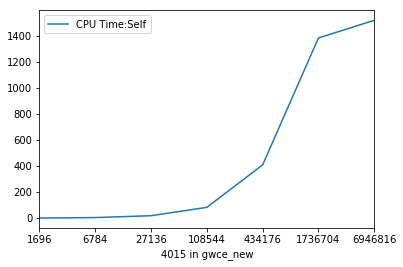

In [43]:
df = topdown.get_frame("4015 in gwce_new", "CPU Time:Self")
df.plot()
plt.show()

In [56]:
hwevents = VtuneCSV(["./data/scaling/hwevents/1696.csv", "./data/scaling/hwevents/6772.csv"])
hwevents.data[0].head()



,Hardware Event Count:INST_RETIRED.ANY,Hardware Event Count:CPU_CLK_UNHALTED.THREAD,Hardware Event Count:CPU_CLK_UNHALTED.REF_TSC,Module,Function (Full),Source File,Start Address
Function,,,,,,,
4015 in gwce_new,6390000000,2632500000,2662500000,adcirc_og,[Loop at line 4015 in gwce_new],timestep.F,0x4c2b82
5354 in mom_eqs_new_nc,2972500000,1140000000,1142500000,adcirc_og,[Loop at line 5354 in mom_eqs_new_nc],timestep.F,0x4d7602
1939 in pjac,1622500000,655000000,655000000,adcirc_og,[Loop at line 1939 in pjac],itpackv.F,0x521b71
Outside any loop,1370000000,860000000,867500000,[Unknown],[Outside any loop],[Unknown],0x0
5697 in mom_eqs_new_nc,317500000,140000000,140000000,adcirc_og,[Loop at line 5697 in mom_eqs_new_nc],timestep.F,0x4d8aa1


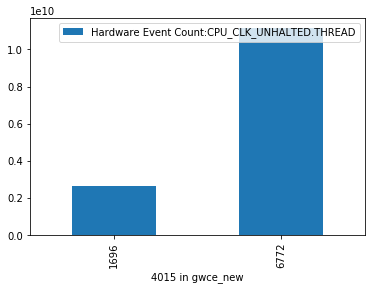

In [57]:
df = hwevents.get_frame("4015 in gwce_new", "Hardware Event Count:CPU_CLK_UNHALTED.THREAD")
df.plot(kind='bar')
plt.show()

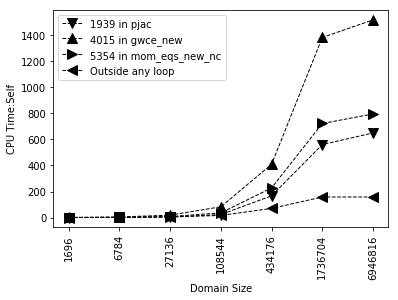

In [59]:
topdown_files = os.listdir("./data/scaling/topdown")
topdown_files = ["./data/scaling/topdown/%s" % a for a in topdown_files]
topdown = VtuneCSV(topdown_files)

csv_names = [os.path.basename(a).split(".csv")[0] for a in topdown_files]
metric="CPU Time:Self"
df1 = topdown.get_frame("1939 in pjac", metric)
df2 = topdown.get_frame("4015 in gwce_new", metric)
df3 = topdown.get_frame("5354 in mom_eqs_new_nc", metric)
df4 = topdown.get_frame("Outside any loop", 'CPU Time:Self')

n = len(df1)
ax1 = plt.plot(np.arange(n),df1, linewidth=1, color='black', marker='v', markersize=10, linestyle='--')
ax2 = plt.plot(np.arange(n),df2, linewidth=1, color='black', marker="^", markersize=10, linestyle='--')
ax3 = plt.plot(np.arange(n),df3, linewidth=1, color='black', marker=">", markersize=10, linestyle='--')
ax4 = plt.plot(np.arange(n),df4, linewidth=1, color='black', marker="<", markersize=10, linestyle='--')

func_names = [df1.index.name, df2.index.name, df3.index.name, df4.index.name]
lgd = plt.legend(func_names, loc='best')
plt.xticks(np.arange(len(df1.index)), df1.index, rotation='vertical')
plt.xlabel("Domain Size")
plt.ylabel("CPU Time:Self")
plt.title("")

plt.show()